# Movie Studio Investment Strategy: Regression Analysis

## Business Problem

Our company now sees all the big companies creating original video content and they want to get in on the fun. And have decided to create a new movie studio, but they don’t know anything about creating movies. So I will be   exploring what types of films are currently doing the best at the box office and translate those findings into actionable insights that the head of the  company's new movie studio can use to help decide what type of films to create.

### Objective:
The goal is to perform a regression analysis to identify which factors (such as production budget, number of votes, average ratings, and genre) are most strongly correlated with a movie's return on investment (ROI). By understanding these relationships, we aim to help the company make data-driven decisions on what types of films to produce in order to maximize profitability.

The focus shall be on :
- Identifying key features (e.g., genre, budget, ratings, etc.) that affect ROI.
- Using regression analysis to quantify the relationship between these features and ROI.
- Providing actionable insights to guide the decision-making process for future film production.

### Data:
- **Production Budget**
- **Number of Votes**
- **Average Ratings**
- **Genre**
- **Runtime**
- **ROI (Return on Investment)**

### Method:
- Perform **Ordinary Least Squares (OLS) Regression** to analyze the relationship between the independent variables (features) and ROI.
- Identify significant predictors of ROI and their impact on profitability.

### Outcome:
The result will be a set of actionable insights that the movie studio can use to guide investment in movie production. This includes recommendations on which genres to focus on, how to budget films effectively, and the importance of ratings and audience engagement in predicting movie success.


# Step 1
* Import the necessary libraries and load the data
* Data already cleaned at the EDA stage

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv("cleaned_movie_budgets_df.csv")
df

,movie_id,movie_name,release_year_movies,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,foodfight!,1970,91,"action,animation,comedy",1.9,8248,2012-12-31,45000000,0,73706
1,tt0359950,the secret life of walter mitty,1970,114,"adventure,comedy,drama",7.3,275300,2013-12-25,91000000,58236838,187861183
2,tt0365907,a walk among the tombstones,1970,114,"action,crime,drama",6.5,105116,2014-09-19,28000000,26017685,62108587
3,tt0369610,jurassic world,1970,124,"action,adventure,sci-fi",7.0,539338,2015-06-12,215000000,652270625,1648854864
4,tt0376136,the rum diary,1970,119,"comedy,drama",6.2,94787,2011-10-28,45000000,13109815,21544732
...,...,...,...,...,...,...,...,...,...,...,...
1421,tt8043306,teefa in trouble,1970,155,"action,comedy,crime",7.4,2724,2018-07-20,1500000,0,98806
1422,tt8155288,happy death day 2u,1970,100,"drama,horror,mystery",6.3,27462,2019-02-13,9000000,28051045,64179495
1423,tt8580348,perfectos desconocidos,1970,97,comedy,6.7,702,2017-12-31,4000000,0,31166312
1424,tt8632862,fahrenheit 11/9,1970,128,documentary,6.7,11628,2018-09-21,5000000,6352306,6653715


# 
Step 2 
* set up the dependent and independent variables
* calculate the **ROI** which will be used as the dependent variable
* standardize the genres
* fit the model with x and y vairbless
  

In [21]:

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract features from release_date
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
# 3. Calculate ROI and add it as a new column
# 3. Calculate ROI and add it as a new column
df['ROI'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget']
df

,movie_id,movie_name,release_year_movies,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,release_year,release_month,ROI
0,tt0249516,foodfight!,1970,91,"action,animation,comedy",1.9,8248,2012-12-31,45000000,0,73706,2012,12,-0.998362
1,tt0359950,the secret life of walter mitty,1970,114,"adventure,comedy,drama",7.3,275300,2013-12-25,91000000,58236838,187861183,2013,12,1.064409
2,tt0365907,a walk among the tombstones,1970,114,"action,crime,drama",6.5,105116,2014-09-19,28000000,26017685,62108587,2014,9,1.218164
3,tt0369610,jurassic world,1970,124,"action,adventure,sci-fi",7.0,539338,2015-06-12,215000000,652270625,1648854864,2015,6,6.669092
4,tt0376136,the rum diary,1970,119,"comedy,drama",6.2,94787,2011-10-28,45000000,13109815,21544732,2011,10,-0.521228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,tt8043306,teefa in trouble,1970,155,"action,comedy,crime",7.4,2724,2018-07-20,1500000,0,98806,2018,7,-0.934129
1422,tt8155288,happy death day 2u,1970,100,"drama,horror,mystery",6.3,27462,2019-02-13,9000000,28051045,64179495,2019,2,6.131055
1423,tt8580348,perfectos desconocidos,1970,97,comedy,6.7,702,2017-12-31,4000000,0,31166312,2017,12,6.791578
1424,tt8632862,fahrenheit 11/9,1970,128,documentary,6.7,11628,2018-09-21,5000000,6352306,6653715,2018,9,0.330743


In [22]:
# Convert genre strings into multiple binary (one-hot) columns
df['genres_list'] = df['genres'].str.lower().str.split(',')


In [23]:
# Extract all unique genres
all_genres = sorted(set(genre for sublist in df['genres_list'] for genre in sublist))

In [24]:
# Create binary columns for each genre
for genre in all_genres:
    df[f'genre_{genre}'] = df['genres_list'].apply(lambda x: int(genre in x))

In [25]:

# 5. Remove outliers using Z-scores (e.g., for 'production_budget' and 'worldwide_gross')
z_scores = np.abs(stats.zscore(df[['production_budget', 'worldwide_gross', 'ROI']]))  # Calculate Z-scores
threshold = 3  # You can adjust this threshold
df_cleaned = df[(z_scores < threshold).all(axis=1)]  # Remove outliers


In [26]:
# 6. Define features (X) and target (y)
feature_cols = ['runtime_minutes', 'production_budget', 'numvotes', 'averagerating', 'release_year', 'release_month'] + [f'genre_{g}' for g in all_genres]
X = df_cleaned[feature_cols]  # Ensure that this is referencing the cleaned data
y = df_cleaned['ROI']

In [27]:
# Add a constant to the features (for the intercept in OLS regression)
X = sm.add_constant(X)
# OLS Regression Model
model_ols = sm.OLS(y, X).fit()

# OLS Summary Table
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     14.00
Date:                Thu, 01 May 2025   Prob (F-statistic):           5.63e-55
Time:                        20:36:04   Log-Likelihood:                -3194.0
No. Observations:                1346   AIC:                             6444.
Df Residuals:                    1318   BIC:                             6590.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -97.1314     29.89

### Explanation of OLS Regression Results

The OLS (Ordinary Least Squares) regression model was used to predict the **Return on Investment (ROI)** based on several predictor variables such as **runtime_minutes**, **production_budget**, **numvotes**, **averagerating**, **release_year**, **release_month**, and various **genre** categories.

#### Key Model Metrics:

- **R-squared**: 0.223
  - This indicates that approximately 22.3% of the variance in ROI is explained by the predictor variables included in the model. While this is a modest amount, it suggests that there are other factors not included in this model that could influence ROI.

- **Adj. R-squared**: 0.207
  - This value adjusts for the number of predictors in the model, accounting for the possibility of overfitting. The relatively close value to R-squared implies that the model is not overfitted.

- **F-statistic**: 14.00, **Prob (F-statistic)**: 5.63e-55
  - The F-statistic tests the overall significance of the model. A low p-value (5.63e-55) suggests that the model is statistically significant and that at least one of the predictors has a significant relationship with the ROI.

- **AIC (Akaike Information Criterion)**: 6444, **BIC (Bayesian Information Criterion)**: 6590
  - These are measures of the model's fit and complexity. Lower values generally indicate a better fit. The AIC and BIC values are used to compare different models, where lower values are preferred.

#### Key Coefficients and Interpretation:

- **const (Intercept)**: -97.1314
  - The negative intercept suggests that when all predictors are zero, the model predicts a negative ROI. However, the intercept by itself is not usually of primary interest, as it does not hold much practical meaning in this context.

- **runtime_minutes**: -0.0035
  - This coefficient suggests that for each additional minute of runtime, the ROI decreases by approximately 0.0035 units. However, the p-value (0.522) is large, indicating that this relationship is not statistically significant.

- **production_budget**: -1.766e-08
  - The negative coefficient indicates a very small, inverse relationship between production budget and ROI. A higher production budget is expected to slightly decrease ROI, but this effect is extremely small. The p-value (0.000) indicates statistical significance.

- **numvotes**: 8.641e-06
  - A positive coefficient, which suggests that as the number of votes increases, the ROI increases. This relationship is statistically significant with a p-value of 0.000.

- **averagerating**: 0.4020
  - The positive relationship indicates that higher average ratings lead to a higher ROI. This is statistically significant (p-value 0.000), making it one of the strongest predictors of ROI in the model.

- **release_year**: 0.0483
  - The positive coefficient suggests that movies released in more recent years tend to have a higher ROI, though the effect is relatively small.

- **release_month**: -0.0308
  - The negative coefficient indicates a slight decrease in ROI for movies released in certain months, but this relationship is not statistically significant (p-value 0.147).

#### Genre-specific Effects:

- **genre_action**, **genre_adventure**, **genre_comedy**, and others: 
  - Many genre variables have coefficients close to zero and p-values above 0.05, indicating that these genres do not significantly influence the ROI in the model.
  
- **genre_crime**: -1.1601
  - The negative coefficient suggests that crime movies tend to have a lower ROI compared to other genres. This is statistically significant (p-value 0.000), meaning crime genre has a strong negative relationship with ROI.

- **genre_animation**: 0.9544
  - Animation movies show a positive effect on ROI, with a significant p-value (0.013), meaning this genre has a favorable influence on ROI.

- **genre_horror**: 0.6549
  - Horror movies also show a positive relationship with ROI, and this effect is statistically significant (p-value 0.024).

- **genre_war**: -1.3635
  - War movies tend to have a lower ROI compared to other genres, and the effect is statistically significant (p-value 0.013).

- **genre_western**: -1.7912
  - Similar to war movies, westerns also have a significantly negative impact on ROI (p-value 0.027).

#### Conclusion:

The model indicates that certain factors, such as **production budget**, **numvotes**, **averagerating**, and **genre-specific categories** like **crime** and **animation**, significantly influence ROI. However, many genre-related variables show no significant effect, suggesting that not all genres are impactful in predicting ROI.

The overall model is statistically significant, but the relatively low R-squared suggests that there may be other important variables not included in this analysis that could explain a larger portion of the variability in ROI.


# Step 3 
## Evaluating the model


In [28]:
# finding the MSE and R^2
# Train a linear regression model for predictions 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# . Linear regression model for predicted ROI
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#  Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the linear regression model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# 13. Output R² score and MSE for Linear Regression
print(f"\nLinear Regression Model:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")



Linear Regression Model:
R² Score: 0.2374
Mean Squared Error: 5.3487


### Model Evaluation Results: Linear Regression

- **R² Score**: 0.2374  
  - **Interpretation**: The R² value indicates that approximately **23.74%** of the variance in the dependent variable (`ROI`) is explained by the independent variables in the model. A low R² value suggests that the model does not explain a large portion of the variability in the data.

- **Mean Squared Error (MSE)**: 5.3487  
  - **Interpretation**: The MSE measures the average squared difference between the actual and predicted values. A higher value indicates that the model's predictions are further from the true values. In this case, an MSE of 5.3487 suggests there is some error in the predictions, but it can be improved with further feature engineering or model adjustments.


# Step 4 : Visualizations


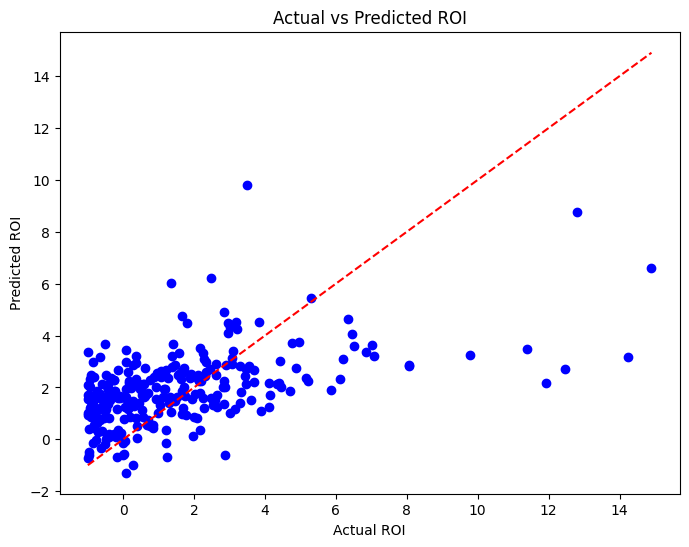

In [29]:


# Ploting the actual value vs the predicted values 

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Actual vs Predicted ROI')
plt.xlabel('Actual ROI')
plt.ylabel('Predicted ROI')


plt.show();


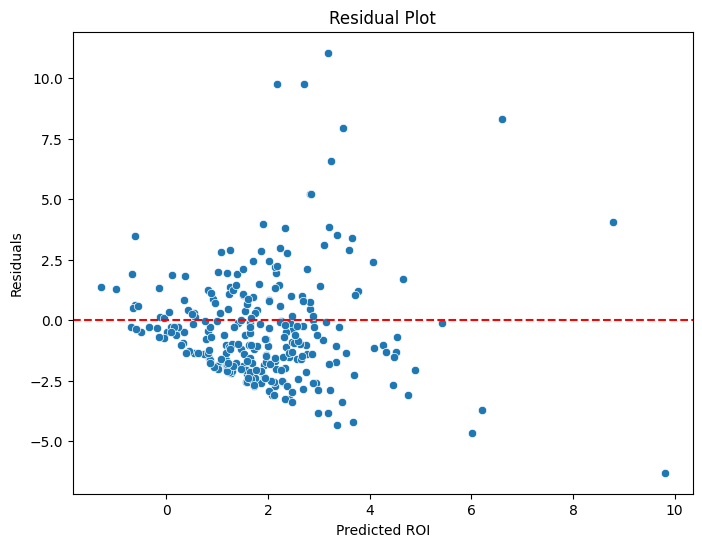

In [30]:


# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted ROI')
plt.ylabel('Residuals')
plt.show()


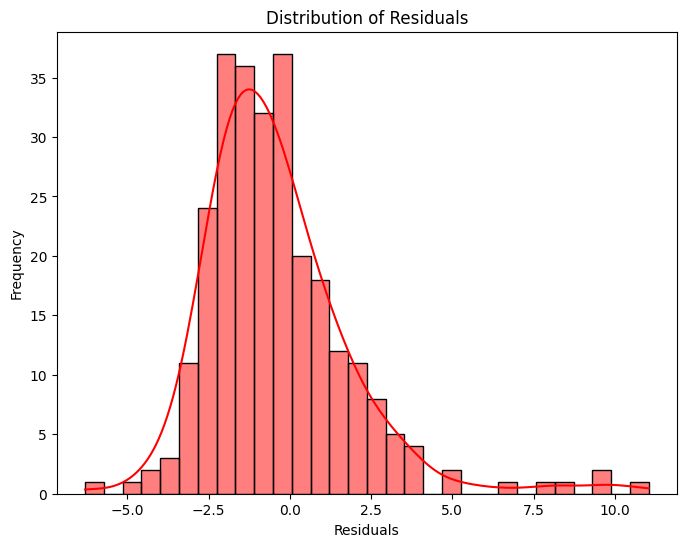

In [31]:
# plot the histogram for residual
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color='red')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

